In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Kaggle competitions process

### Explore train data

In [2]:
# Read train data
train = pd.read_csv('demand_forecasting_train_1_month.csv')

# Look at the shape of the data
print('Train shape:', train.shape)

# Look at the head of the data
print(train.head())

Train shape: (15500, 5)
       id        date  store  item  sales
0  100000  2017-12-01      1     1     19
1  100001  2017-12-02      1     1     16
2  100002  2017-12-03      1     1     31
3  100003  2017-12-04      1     1      7
4  100004  2017-12-05      1     1     20


### Explore test data

In [3]:
import pandas as pd

# Read test data
test = pd.read_csv('demand_forecasting_test.csv')

# Print train and test columns
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())

Train columns: ['id', 'date', 'store', 'item', 'sales']
Test columns: ['id', 'date', 'store', 'item']


### Train a simple model

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Read train data
train = pd.read_csv('demand_forecasting_train_1_month.csv')

# Create Random Forest object
rf = RandomForestRegressor(n_estimators = 10)

# Train a model
rf.fit(X=train[['store', 'item']], y=train['sales'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### Prepare a submission

In [5]:
# Read test and sample submission data
test = pd.read_csv('demand_forecasting_test.csv')

# Get predictions for the test set
test['sales'] = rf.predict(test[['store', 'item']])

# Write test predictions in the sample_submission format
test[['sales']].to_csv('kaggle_submission.csv', index=False)

### Train XGBoost models

In [6]:
import xgboost as xgb
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth':2,
          'silent': 1}

# Train xgboost model
xg_depth_2 = xgb.train(params=params, dtrain=dtrain)

In [7]:
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 8,
          'silent': 1}

# Train xgboost model
xg_depth_8 = xgb.train(params=params, dtrain=dtrain)

In [8]:
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 15,
          'silent': 1}

# Train xgboost model
xg_depth_15 = xgb.train(params=params, dtrain=dtrain)

### Explore overfitting XGBoost

In [9]:
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(data=train[['store', 'item']])
dtest = xgb.DMatrix(data=test[['store', 'item']])

# For each of 3 trained models
for model in [xg_depth_2, xg_depth_8, xg_depth_15]:
    # Make predictions
    train_pred = model.predict(dtrain)     
    test_pred = model.predict(dtest)          
    
    # Compute metrics
    mse_train = mean_squared_error(train['sales'], train_pred)                  
    mse_test = mean_squared_error(test['sales'], test_pred)
    print('MSE Train: {:.3f}. MSE Test: {:.3f}'.format(mse_train, mse_test))

MSE Train: 331.064. MSE Test: 250.332
MSE Train: 112.057. MSE Test: 31.194
MSE Train: 84.952. MSE Test: 3.924


## Dive into the Competition

### Define a competition metric

In [10]:
y_regression_true= np.array([0.7, 0.29, 0.23, 0.55, 0.72, 0.42, 0.98, 0.68, 0.48, 0.39, 0.34, 0.73, 0.44, 0.06, 0.4, 0.74, 0.18, 0.18, 0.53, 0.53, 0.63, 0.85, 0.72, 0.61, 0.72, 0.32, 0.36, 0.23, 0.29, 0.63, 0.09, 0.43, 0.43, 0.49, 0.43, 0.31, 0.43, 0.89, 0.94, 0.5, 0.62, 0.12, 0.32, 0.41, 0.87, 0.25, 0.48, 0.99, 0.52, 0.61, 0.12, 0.83, 0.6, 0.55, 0.34, 0.3, 0.42, 0.68, 0.88, 0.51, 0.67, 0.59, 0.62, 0.67, 0.84, 0.08, 0.76, 0.24, 0.19, 0.57, 0.1, 0.89, 0.63, 0.72, 0.02, 0.59, 0.56, 0.16, 0.15, 0.7, 0.32, 0.69, 0.55, 0.39, 0.93, 0.84, 0.36, 0.04, 0.3, 0.4, 0.7, 1.0, 0.36, 0.76, 0.59, 0.69, 0.15, 0.4, 0.24, 0.34])

In [11]:
y_regression_pred = np.array([0.51, 0.67, 0.11, 0.13, 0.32, 0.66, 0.85, 0.55, 0.85, 0.38, 0.32, 0.35, 0.17, 0.83, 0.34, 0.55, 0.58, 0.52, 0.0, 0.99, 0.91, 0.21, 0.29, 0.52, 0.9, 0.98, 0.26, 0.56, 0.81, 0.39, 0.73, 0.16, 0.6, 0.87, 0.98, 0.08, 0.43, 0.2, 0.45, 0.55, 0.09, 0.3, 0.93, 0.57, 0.46, 0.75, 0.74, 0.05, 0.71, 0.84, 0.17, 0.78, 0.29, 0.31, 0.67, 0.11, 0.66, 0.89, 0.7, 0.44, 0.44, 0.77, 0.57, 0.08, 0.58, 0.81, 0.34, 0.93, 0.75, 0.57, 0.75, 0.08, 0.86, 0.82, 0.91, 0.13, 0.08, 0.14, 0.4, 0.42, 0.56, 0.12, 0.2, 0.81, 0.47, 0.81, 0.01, 0.55, 0.93, 0.58, 0.21, 0.72, 0.38, 0.67, 0.03, 0.64, 0.03, 0.74, 0.47, 0.12])

In [12]:
import numpy as np

# Import MSE from sklearn
from sklearn.metrics import mean_squared_error

# Define your own MSE function
def own_mse(y_true, y_pred):
  	# Find squared differences
    squares = np.power(y_true - y_pred, 2)
    # Find mean over all observations
    err = np.mean(squares)
    return err

print('Sklearn MSE: {:.5f}. '.format(mean_squared_error(y_regression_true, y_regression_pred)))
print('Your MSE: {:.5f}. '.format(own_mse(y_regression_true, y_regression_pred)))

Sklearn MSE: 0.15416. 
Your MSE: 0.15416. 


In [13]:
y_classification_true = np.array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [14]:
y_classification_pred = np.array([0.21, 0.44, 0.72, 0.41, 0.19, 0.97, 0.65, 0.87, 0.03, 0.27, 0.5, 0.07, 0.99, 0.24, 0.37, 0.21, 0.11, 0.23, 0.3, 0.63, 0.28, 0.36, 0.01, 0.37, 0.53, 0.16, 0.6, 0.29, 0.63, 0.03, 0.89, 0.02, 0.13, 0.78, 0.05, 0.71, 0.97, 0.87, 0.71, 0.96, 0.43, 0.87, 0.36, 0.93, 0.15, 0.94, 0.83, 0.85, 0.12, 0.6, 0.02, 0.72, 0.01, 0.08, 0.23, 0.88, 0.36, 0.54, 0.57, 0.23, 0.57, 0.66, 0.3, 0.42, 0.45, 0.93, 0.59, 0.95, 0.56, 0.5, 0.0, 0.48, 0.93, 0.2, 0.05, 0.41, 0.37, 0.86, 0.03, 0.92, 0.68, 0.9, 0.61, 0.81, 0.34, 0.35, 0.39, 0.75, 0.37, 0.24, 0.94, 0.91, 0.35, 0.63, 0.27, 0.21, 0.34, 0.33, 0.88, 0.82])

In [15]:
import numpy as np

# Import log_loss from sklearn
from sklearn.metrics import log_loss

# Define your own LogLoss function
# def own_logloss(y_true, prob_pred):
#   	# Find loss for each observation
#     terms = y_true * np.log(prob_pred) + (1 - y_true) * np.log(1-prob_pred)
#     # Find mean over all observations
#     err = np.mean(terms) 
#     return -err

print('Sklearn LogLoss: {:.5f}'.format(log_loss(y_classification_true, y_classification_pred)))
# print('Your LogLoss: {:.5f}'.format(own_logloss(y_classification_true, y_classification_pred)))

Sklearn LogLoss: 1.09755


### EDA statistics

In [16]:
train = pd.read_csv('taxi_train_chapter_4.csv')
test = pd.read_csv('taxi_test_chapter_4.csv')

In [17]:
# Shapes of train and test data
print('Train shape:', train.shape)
print('Test shape:', test.shape)

# Train head
display(train.head())

# Describe the target variable
print(train.fare_amount.describe())

# Train distribution of passengers within rides
print(train.passenger_count.value_counts())

Train shape: (20000, 8)
Test shape: (9914, 7)


,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


count    20000.000000
mean        11.303321
std          9.541637
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        180.000000
Name: fare_amount, dtype: float64
1    13999
2     2912
5     1327
3      860
4      420
6      407
0       75
Name: passenger_count, dtype: int64


### EDA plots I

In [18]:
def haversine_distance(train):
    
    data = [train]
    lat1, long1, lat2, long2 = 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'
    
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        
    return d

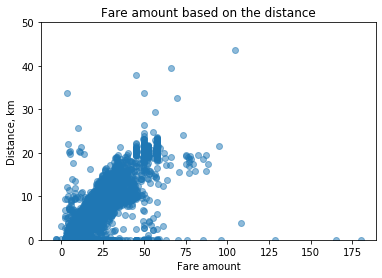

In [19]:
# Calculate the ride distance
train['distance_km'] = haversine_distance(train)

# Draw a scatterplot
plt.scatter(train['fare_amount'], train['distance_km'], alpha=0.5)
plt.xlabel('Fare amount')
plt.ylabel('Distance, km')
plt.title('Fare amount based on the distance')

# Limit on the distance
plt.ylim(0, 50)
plt.show()

### EDA plots II

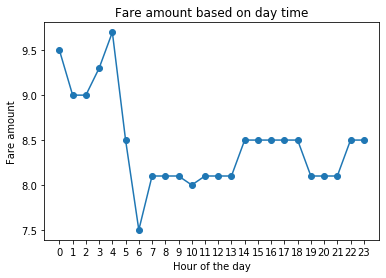

In [20]:
# Create hour feature
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
train['hour'] = train.pickup_datetime.dt.hour

# Find median fare_amount for each hour
hour_price = train.groupby('hour', as_index=False)['fare_amount'].median()

# Plot the line plot
plt.plot(hour_price.hour, hour_price.fare_amount, marker='o')
plt.xlabel('Hour of the day')
plt.ylabel('Fare amount')
plt.title('Fare amount based on day time')
plt.xticks(range(24))
plt.show()

### K-fold cross-validation

In [21]:
train = pd.DataFrame([[10, 1.5, 3, '53a5b119ba8f7b61d4e010512e0dfc85', 40.7145, -73.9425, '5ba989232d0489da1b5f2c45f6688adc', 3000, 'medium'], [10000, 1.0, 2, 'c5c8a357cba207596b04d1afd1e4f130', 40.7947, -73.9667, '7533621a882f71e25173b27e3139d83d', 5465, 'low'], [100004, 1.0, 1, 'c3ba40552e2120b0acfc3cb5730bb2aa', 40.7388, -74.0018, 'd9039c43983f6e564b1482b273bd7b01', 2850, 'high'], [100007, 1.0, 1, '28d9ad350afeaab8027513a3e52ac8d5', 40.7539, -73.9677, '1067e078446a7897d2da493d2f741316', 3275, 'low'], [100013, 1.0, 4, '0', 40.8241, -73.9493, '98e13ad4b495b9613cef886d79a6291f', 3350, 'low'], [100014, 2.0, 4, '38a913e46c94a7f46ddf19b756a9640c', 40.7429, -74.0028, 'b209e2c4384a64cc307c26759ee0c651', 7995, 'medium'], [100016, 1.0, 2, '3ba49a93260ca5df92fde024cb4ca61f', 40.8012, -73.96600000000002, '01287194f20de51872e81f660def4784', 3600, 'low'], [100020, 2.0, 1, '0372927bcb6a0949613ef5bf893bbac7', 40.7427, -73.9957, 'e6472c7237327dd3903b3d6f6a94515a', 5645, 'low'], [100026, 1.0, 1, 'a7efbeb58190aa267b4a9121cd0c88c0', 40.8234, -73.9457, 'c1a6598437b7db560cde66e5a297a53f', 1725, 'medium'], [100027, 2.0, 4, '0', 40.7278, -73.9808, '23a01ea7717b38875f5b070282d1b9d2', 5800, 'low'], [100030, 1.0, 0, '0', 40.7769, -73.9467, 'e32475a6134d6d18279946b7b20a0f12', 1950, 'low'], [10004, 1.0, 1, '0', 40.8448, -73.9396, '2dee0868ac01057760055b856e66e942', 1675, 'low'], [100044, 1.0, 2, '67c9b420da4a365bc26a6cd0ef4a5320', 40.7488, -73.977, '537e06890f6a86dbb70c187db5be4d55', 3000, 'high'], [100048, 2.0, 2, '0', 40.7707, -73.9817, '3813434aabfbad659a45f86a740cd23f', 6895, 'low'], [10005, 1.0, 1, '0', 40.7584, -73.9648, '75f38d077366d7964c2f3bb80c3e7b1d', 3050, 'low'], [100051, 1.0, 0, 'bfb9405149bfff42a92980b594c28234', 40.7439, -73.9743, 'dbbb6b990661b1e507a387f019bcb1a0', 2350, 'medium'], [100052, 1.0, 2, '642cc2c920512ffe2a74c28122f8b47f', 40.7305, -73.983, '0411b25b134141100d8214ed6ec02f56', 3650, 'low'], [100053, 1.0, 1, '0', 40.8643, -73.928, 'ab15d581a04ed87b6f25d5aff8ddde30', 1695, 'low'], [100055, 1.0, 4, 'cc4c6ae9225df6d2395c4e16c235f7ab', 40.7999, -73.9638, '8f5a9c893f6d602f4953fcc0b8e6e9b4', 5000, 'low'], [100058, 1.0, 1, 'dc3cae15729b48fec3394f9295671991', 40.7328, -73.9799, '8f5a9c893f6d602f4953fcc0b8e6e9b4', 3973, 'low'], [100062, 1.0, 3, '205f95d4a78f1f3befda48b89edc9669', 40.7454, -73.9845, '3793e58c60343a3fd6846ca2d2ef3c7f', 4395, 'low'], [100063, 1.0, 2, 'ecea86b79afa539505aa4bad3ff449c6', 40.7427, -73.9794, 'e6472c7237327dd3903b3d6f6a94515a', 2999, 'medium'], [100065, 1.0, 1, '1a6cf9b71da65cdc0cfd5015a75317ac', 40.7447, -73.9741, '8f5a9c893f6d602f4953fcc0b8e6e9b4', 2595, 'low'], [100066, 1.0, 1, 'a6200d7448037cfee809b2451219f879', 40.7074, -74.0081, '6e5c10246156ae5bdcd9b487ca99d96a', 3695, 'low'], [10007, 2.0, 4, '05b871a1e1e0368391160bcefc608e00', 40.7391, -73.9936, '0cff4a2a147d81e51ae8a91289e129f7', 7400, 'medium'], [100071, 3.5, 4, '45b4143a9841eb63d7203c4f21a64ff7', 40.7584, -73.9653, 'ad3d8ddc52c7e0859b5c6c7f7949c3bd', 7500, 'low'], [100075, 1.0, 1, 'd68497ff1f5ac77f143e5f21817ed6fb', 40.7728, -73.9502, '4f9b376a972b863bbfbdcdc8d717fa4e', 2295, 'medium'], [100076, 1.0, 1, 'ec447453d3b8033e14a7b54ba1e13e02', 40.7709, -73.9917, '63e8c482071c22f43dd91b954e75cc2c', 3164, 'low'], [100079, 1.0, 1, 'f06ad2f6f1a821c8efc03dc195d369df', 40.8335, -73.9141, '12c0a30e296faa0dfd422fe918d7d4f4', 1350, 'high'], [100081, 2.0, 2, 'f115a9bff3a9c4e6eedc9114374b3d74', 40.7716, -73.9506, '797f306f24780e1a24e4f063d46a2d8d', 5600, 'low'], [100083, 1.0, 0, '10901f921370e636cef42c4bbed02483', 40.7897, -73.976, '92ff104c90a9c40d153ea970e19c27c1', 2750, 'medium'], [100084, 1.0, 2, '0aa1e10d1f77ce334a02ecd84558f439', 40.7902, -73.9678, 'bce75205499f22e47b0c1aa94e09131c', 3500, 'medium'], [100085, 1.0, 1, '7b932952de7f92e25ee7acc7eeb3b55c', 40.7179, -74.0148, '9e75980b063d7d41226e28ebc8e02824', 5165, 'low'], [100087, 1.0, 2, '46b5fd6e1ed6d002f5e6557f7e25bce1', 40.7301, -73.9942, '9e4ef9d8a24f407bf0b355b27f0d9965', 4400, 'low'], [10009, 1.0, 2, '3ae1e557d21e2a2e080e29aac7dd60c6', 40.844, -73.9404, '7c5e4fc025b70c6540d6b0e06716b9dd', 2300, 'low'], [100090, 1.0, 1, '0', 40.79, -73.9418, '42931f67f3661ec1b33d6b7e42754d9a', 1650, 'low'], [100096, 1.0, 0, '0', 40.8184, -73.9389, 'fb520ae87b8a3b3eb646e137f0c8ddc8', 1300, 'low'], [100098, 1.0, 0, '7d2a37e6633ae6e663fca13dfa55d9a9', 40.7649, -73.9763, '32bf3cd19652f17e3764c055b7a9178e', 1980, 'high'], [100099, 2.0, 2, '39661b8ce46a8d71461497819f67c279', 40.7471, -73.9867, 'ad3d8ddc52c7e0859b5c6c7f7949c3bd', 6500, 'low'], [10010, 1.0, 0, 'd0234abbc01a982d54e8d446acc03405', 40.753, -73.9959, '6a6c75bdb10af785bebd2a09a53fc4c2', 2396, 'medium'], [100100, 1.0, 3, 'be6b7c3fdf3f63a2756306f4af7788a6', 40.7231, -74.0044, '64249f81378907ae7cf65e8ccb4bd8dc', 3733, 'low'], [100102, 3.0, 4, 'cd5dbf58ff7014957be69643a96aaaf5', 40.7723, -73.9533, '964dc31a872efa33fee9af11f62e843c', 15000, 'low'], [100107, 1.0, 0, '0', 40.7753, -73.954, '537e06890f6a86dbb70c187db5be4d55', 2400, 'medium'], [100112, 1.0, 0, '7b48df0cc3a04a24b062efbc5cf5022e', 40.7739, -73.9511, 'cb87dadbca78fad02b388dc9e8f25a5b', 1850, 'medium'], [100113, 1.0, 1, '0', 40.8031, -73.957, 'baf2b718f413a41eba82a1354a82ca86', 2500, 'low'], [100115, 1.0, 1, '1bd24d2906d981ec60703de71921dd2e', 40.7975, -73.9626, '44500d5a13767adee85ea875fb2d3bd5', 2045, 'medium'], [100117, 1.0, 0, '379a891accd668964c9d2080cce45179', 40.7372, -73.9981, 'aa5f74da43dceaca9b34ed7f55a39f5d', 2650, 'low'], [100119, 1.0, 2, '7bc33ecc302c59a2f179803c3f90a03f', 40.7479, -74.0005, '6be05c0ba31bf6adce280cf734933a12', 3745, 'low'], [10012, 1.0, 1, 'cdf3e0d9b2c48161b2432786b3ed0cd0', 40.7802, -73.9504, 'ac888923cda3b9e4f0311267be25de9c', 1900, 'low'], [100124, 1.0, 2, 'a6fb47bf44e73e699b9acf3d8cde48f0', 40.7377, -73.9831, '046ed6c8a67bc942fcf4ca43e96f27d8', 5595, 'low']], columns = ['id', 'bathrooms', 'bedrooms', 'building_id', 'latitude', 'longitude', 'manager_id', 'price', 'interest_level'])

In [22]:
train.to_csv('twosigma_train.csv')

In [23]:
# Import KFold
from sklearn.model_selection import KFold

# Create a KFold object
kf = KFold(n_splits=3, shuffle=True, random_state=123)

# Loop through each split
fold = 0
for train_index, test_index in kf.split(train):
    # Obtain training and testing folds
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    print('Fold: {}'.format(fold))
    print('CV train shape: {}'.format(cv_train.shape))
    print('Medium interest listings in CV train: {}\n'.format(sum(cv_train.interest_level == 'medium')))
    fold += 1

Fold: 0
CV train shape: (33, 9)
Medium interest listings in CV train: 8

Fold: 1
CV train shape: (33, 9)
Medium interest listings in CV train: 9

Fold: 2
CV train shape: (34, 9)
Medium interest listings in CV train: 9



### Stratified K-fold

In [24]:
# Import StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Create a StratifiedKFold object
str_kf = StratifiedKFold(n_splits=3, shuffle = True, random_state=123)

# Loop through each split
fold = 0
for train_index, test_index in str_kf.split(train, train.interest_level):
    # Obtain training and testing folds
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    print('Fold: {}'.format(fold))
    print('CV train shape: {}'.format(cv_train.shape))
    print('Medium interest listings in CV train: {}\n'.format(sum(cv_train.interest_level == 'medium')))
    fold += 1

Fold: 0
CV train shape: (32, 9)
Medium interest listings in CV train: 8

Fold: 1
CV train shape: (34, 9)
Medium interest listings in CV train: 9

Fold: 2
CV train shape: (34, 9)
Medium interest listings in CV train: 9



### Time K-fold

In [25]:
# Read train data
train = pd.read_csv('demand_forecasting_train_1_month.csv')

In [26]:
from sklearn.model_selection import TimeSeriesSplit

# Create TimeSeriesSplit object
time_kfold = TimeSeriesSplit(n_splits = 3)

# Sort train data by date
train = train.sort_values('date')

# Iterate through each split
fold = 0
for train_index, test_index in time_kfold.split(train):
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
    print('Fold :', fold)
    print('Train date range: from {} to {}'.format(cv_train.date.min(), cv_train.date.max()))
    print('Test date range: from {} to {}\n'.format(cv_test.date.min(), cv_test.date.max()))
    fold += 1

Fold : 0
Train date range: from 2017-12-01 to 2017-12-08
Test date range: from 2017-12-08 to 2017-12-16

Fold : 1
Train date range: from 2017-12-01 to 2017-12-16
Test date range: from 2017-12-16 to 2017-12-24

Fold : 2
Train date range: from 2017-12-01 to 2017-12-24
Test date range: from 2017-12-24 to 2017-12-31



### Overall validation score

In [27]:
def get_fold_mse(train, kf):
    mse_scores = []
    
    for train_index, test_index in kf.split(train):
        fold_train, fold_test = train.loc[train_index], train.loc[test_index]

        # Fit the data and make predictions
        # Create a Random Forest object
        rf = RandomForestRegressor(n_estimators=10, random_state=123)

        # Train a model
        rf.fit(X=fold_train[['store', 'item']], y=fold_train['sales'])

        # Get predictions for the test set
        pred = rf.predict(fold_test[['store', 'item']])
    
        fold_score = round(mean_squared_error(fold_test['sales'], pred), 5)
        mse_scores.append(fold_score)
        
    return mse_scores

In [28]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Sort train data by date
train = train.sort_values('date')

# Initialize 3-fold time cross-validation
kf = TimeSeriesSplit(n_splits=3)

# Get MSE scores for each cross-validation split
mse_scores = get_fold_mse(train, kf)

print('Mean validation MSE: {:.5f}'.format(np.mean(mse_scores)))
print('MSE by fold: {}'.format(mse_scores))
print('Overall validation MSE: {:.5f}'.format(np.mean(mse_scores) + np.std(mse_scores)))

Mean validation MSE: 955.49186
MSE by fold: [890.30336, 961.65797, 1014.51424]
Overall validation MSE: 1006.38784


## Feature Engineering

In [29]:
train = pd.read_csv('house_prices_train.csv')
test = pd.read_csv('house_prices_test.csv')
train.head()

,Id,LotArea,OverallQual,YearBuilt,RoofStyle,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,1,8450,7,2003,Gable,856,Y,856,854,2,1,3,1,8,2,548,208500
1,2,9600,6,1976,Gable,1262,Y,1262,0,2,0,3,1,6,2,460,181500
2,3,11250,7,2001,Gable,920,Y,920,866,2,1,3,1,6,2,608,223500
3,4,9550,7,1915,Gable,756,Y,961,756,1,0,3,1,7,3,642,140000
4,5,14260,8,2000,Gable,1145,Y,1145,1053,2,1,4,1,9,3,836,250000


### Arithmetical features

In [30]:
def get_kfold_rmse(train):
    mse_scores = []

    for train_index, test_index in kf.split(train):
        train = train.fillna(0)
        feats = [x for x in train.columns if x not in ['Id', 'SalePrice', 'RoofStyle', 'CentralAir']]
        
        fold_train, fold_test = train.loc[train_index], train.loc[test_index]

        # Fit the data and make predictions
        # Create a Random Forest object
        rf = RandomForestRegressor(n_estimators=10, min_samples_split=10, random_state=123)

        # Train a model
        rf.fit(X=fold_train[feats], y=fold_train['SalePrice'])

        # Get predictions for the test set
        pred = rf.predict(fold_test[feats])
    
        fold_score = mean_squared_error(fold_test['SalePrice'], pred)
        mse_scores.append(np.sqrt(fold_score))
        
    return round(np.mean(mse_scores) + np.std(mse_scores), 2)

In [31]:
# Look at the initial RMSE
print('RMSE before feature engineering:', get_kfold_rmse(train))

# Add total area of the house
train['TotalArea'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
print('RMSE with total area:', get_kfold_rmse(train))

# Add garder area of the property
train['GardenArea'] = train['LotArea'] - train['1stFlrSF']
print('RMSE with garden area:', get_kfold_rmse(train))

# Add total number of bathrooms
train['TotalBath'] = train['FullBath'] + train['HalfBath']
print('RMSE with number of bathrooms:', get_kfold_rmse(train))

RMSE before feature engineering: 39774.72
RMSE with total area: 36823.99
RMSE with garden area: 36736.5
RMSE with number of bathrooms: 36624.96


### Date features

In [32]:
train = pd.read_csv('taxi_train_chapter_4.csv')
test = pd.read_csv('taxi_test_chapter_4.csv')

In [33]:
# Concatenate train and test together
taxi = pd.concat([train, test])

# Convert pickup date to datetime object
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])

# Create day of week feature
taxi['day_of_week'] = taxi['pickup_datetime'].dt.dayofweek

# Create hour feature
taxi['hour'] = taxi['pickup_datetime'].dt.hour

# Split back into train and test
new_train = taxi[taxi.id.isin(train.id)]
new_test = taxi[taxi.id.isin(test.id)]

### Label encoding

In [34]:
train = pd.read_csv('house_prices_train.csv')
test = pd.read_csv('house_prices_test.csv')

In [35]:
# Concatenate train and test together
houses = pd.concat([train, test])

# Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Create new features
houses['RoofStyle_enc'] = le.fit_transform(houses['RoofStyle'])
houses['CentralAir_enc'] = le.fit_transform(houses['CentralAir'])

# Look at new features
print(houses[['RoofStyle', 'RoofStyle_enc', 'CentralAir', 'CentralAir_enc']].head())

  RoofStyle  RoofStyle_enc CentralAir  CentralAir_enc
0     Gable              1          Y               1
1     Gable              1          Y               1
2     Gable              1          Y               1
3     Gable              1          Y               1
4     Gable              1          Y               1


### One-Hot encoding

In [36]:
# Concatenate train and test together
houses = pd.concat([train, test])

# Label encode binary 'CentralAir' feature
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
houses['CentralAir_enc'] = le.fit_transform(houses['CentralAir'])

# Create One-Hot encoded features
ohe = pd.get_dummies(houses['RoofStyle'], prefix='RoofStyle')

# Concatenate OHE features to houses
houses = pd.concat([houses, ohe], axis=1)

# Look at OHE features
display(houses[[col for col in houses.columns if 'RoofStyle' in col]].head(3))

,RoofStyle,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,Gable,0,1,0,0,0,0
1,Gable,0,1,0,0,0,0
2,Gable,0,1,0,0,0,0


### Mean target encoding

In [37]:
def test_mean_target_encoding(train, test, target, categorical, alpha=5):
    # Calculate global mean on the train data
    global_mean = train[target].mean()
    
    # Group by the categorical feature and calculate its properties
    train_groups = train.groupby(categorical)
    category_sum = train_groups[target].sum()
    category_size = train_groups.size()
    
    # Calculate smoothed mean target statistics
    train_statistics = (category_sum + global_mean * alpha) / (category_size + alpha)
    
    # Apply statistics to the test data and fill new categories
    test_feature = test[categorical].map(train_statistics).fillna(global_mean)
    return test_feature.values

In [38]:
def train_mean_target_encoding(train, target, categorical, alpha=5):
    # Create 5-fold stratified cross-validation
    skf = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
    train_feature = pd.Series(index=train.index)
    
    # For each folds split
    for train_index, test_index in skf.split(train, train[target]):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
      
        # Calculate out-of-fold statistics and apply to cv_test
        cv_test_feature = test_mean_target_encoding(cv_train, cv_test, target, categorical, alpha)
        
        # Save new feature for this particular fold
        train_feature.iloc[test_index] = cv_test_feature       
    return train_feature.values

In [39]:
def mean_target_encoding(train, test, target, categorical, alpha=5):
  
    # Get test feature
    test_feature = test_mean_target_encoding(train, test, target, categorical, alpha)
    
    # Get train feature
    train_feature = train_mean_target_encoding(train, target, categorical, alpha)
    
    # Return new features to add to the model
    return train_feature, test_feature

### K-fold cross-validation

In [40]:
bryant_shots = pd.DataFrame([[2, 20000012, 34.0443, -118.4268, 10, 0, '2000-01', 15, '2PT Field Goal', 0.0], [3, 20000012, 33.9093, -118.3708, 7, 0, '2000-01', 16, '2PT Field Goal', 1.0], [4, 20000012, 33.8693, -118.1318, 6, 0, '2000-01', 22, '2PT Field Goal', 0.0], [5, 20000012, 34.0443, -118.2698, 6, 0, '2000-01', 0, '2PT Field Goal', 1.0], [6, 20000012, 34.0553, -118.4148, 9, 0, '2000-01', 14, '2PT Field Goal', 0.0], [7, 20000012, 34.0443, -118.2698, 8, 0, '2000-01', 0, '2PT Field Goal', 1.0], [9, 20000012, 33.9363, -118.3348, 6, 0, '2000-01', 12, '2PT Field Goal', 1.0], [10, 20000012, 33.9193, -118.3028, 3, 0, '2000-01', 12, '2PT Field Goal', 0.0], [11, 20000012, 33.8063, -118.3638, 1, 0, '2000-01', 25, '3PT Field Goal', 0.0], [12, 20000019, 33.9173, -118.1488, 11, 0, '2000-01', 17, '2PT Field Goal', 1.0], [13, 20000019, 33.9343, -118.3368, 7, 0, '2000-01', 12, '2PT Field Goal', 1.0], [14, 20000019, 34.0403, -118.3638, 2, 0, '2000-01', 9, '2PT Field Goal', 0.0], [15, 20000019, 33.9973, -118.2928, 1, 0, '2000-01', 5, '2PT Field Goal', 0.0], [16, 20000019, 33.8523, -118.2078, 0, 0, '2000-01', 20, '2PT Field Goal', 0.0], [18, 20000019, 33.8183, -118.3868, 8, 0, '2000-01', 25, '3PT Field Goal', 1.0], [19, 20000019, 33.9473, -118.4018, 11, 0, '2000-01', 16, '2PT Field Goal', 0.0], [21, 20000019, 33.9003, -118.2668, 10, 0, '2000-01', 14, '2PT Field Goal', 0.0], [22, 20000019, 33.9173, -118.1358, 9, 0, '2000-01', 18, '2PT Field Goal', 0.0], [23, 20000019, 33.9343, -118.2858, 7, 0, '2000-01', 11, '2PT Field Goal', 1.0], [24, 20000019, 33.8943, -118.3788, 5, 0, '2000-01', 18, '2PT Field Goal', 1.0], [25, 20000019, 33.9813, -118.3158, 5, 0, '2000-01', 7, '2PT Field Goal', 1.0], [26, 20000019, 34.0443, -118.2698, 2, 0, '2000-01', 0, '2PT Field Goal', 0.0], [27, 20000019, 33.8483, -118.3278, 2, 0, '2000-01', 20, '2PT Field Goal', 0.0], [28, 20000019, 33.8583, -118.4528, 0, 0, '2000-01', 26, '3PT Field Goal', 0.0], [29, 20000019, 33.8713, -118.1848, 8, 0, '2000-01', 19, '2PT Field Goal', 0.0], [30, 20000019, 33.9573, -118.2668, 6, 0, '2000-01', 8, '2PT Field Goal', 0.0], [31, 20000019, 34.0403, -118.1488, 1, 0, '2000-01', 12, '2PT Field Goal', 1.0], [32, 20000019, 34.0103, -118.1428, 0, 0, '2000-01', 13, '2PT Field Goal', 0.0], [39, 20000047, 33.8603, -118.1788, 3, 0, '2000-01', 20, '2PT Field Goal', 1.0], [40, 20000047, 33.7723, -118.2968, 0, 0, '2000-01', 27, '3PT Field Goal', 1.0]], columns = ['shot_id', 'game_id', 'lat', 'lon', 'minutes_remaining', 'playoffs', 'season', 'shot_distance', 'shot_type', 'shot_made_flag'])

In [41]:
import warnings
warnings.filterwarnings("ignore")

# Create 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

# For each folds split
for train_index, test_index in skf.split(bryant_shots, bryant_shots['shot_made_flag']):
    cv_train, cv_test = bryant_shots.iloc[train_index], bryant_shots.iloc[test_index]
    
    # Create mean target encoded feature
    cv_train['game_id_enc'], cv_test['game_id_enc'] = mean_target_encoding(train=cv_train,
                                                                           test=cv_test,
                                                                           target='shot_made_flag',
                                                                           categorical='game_id',
                                                                           alpha=5)
    # Look at the encoding
    display(cv_train[['game_id', 'shot_made_flag', 'game_id_enc']].sample(n=1))

,game_id,shot_made_flag,game_id_enc
4,20000012,0.0,0.464115


,game_id,shot_made_flag,game_id_enc
8,20000012,0.0,0.422222


,game_id,shot_made_flag,game_id_enc
20,20000019,1.0,0.339181


,game_id,shot_made_flag,game_id_enc
7,20000012,0.0,0.386364


,game_id,shot_made_flag,game_id_enc
9,20000019,1.0,0.402778


### Beyond binary classification

In [42]:
train = pd.read_csv('house_prices_train.csv')
test = pd.read_csv('house_prices_test.csv')

In [43]:
# Create mean target encoded feature
train['RoofStyle_enc'], test['RoofStyle_enc'] = mean_target_encoding(train=train,
                                                                     test=test,
                                                                     target='SalePrice',
                                                                     categorical='RoofStyle',
                                                                     alpha=10)
# Look at the encoding
print(test[['RoofStyle', 'RoofStyle_enc']].drop_duplicates())

     RoofStyle  RoofStyle_enc
0        Gable  171565.947836
1          Hip  217594.645131
98     Gambrel  164152.950424
133       Flat  188703.563431
362    Mansard  180775.938759
1053      Shed  188267.663242


### Find missing data

In [44]:
# Read dataframe
twosigma = pd.read_csv('twosigma_train.csv')

# Find the number of missing values in each column
print(twosigma.isnull().sum())

# Look at the columns with missing values
display(twosigma[["building_id", "price"]].head())

Unnamed: 0        0
id                0
bathrooms         0
bedrooms          0
building_id       0
latitude          0
longitude         0
manager_id        0
price             0
interest_level    0
dtype: int64


,building_id,price
0,53a5b119ba8f7b61d4e010512e0dfc85,3000
1,c5c8a357cba207596b04d1afd1e4f130,5465
2,c3ba40552e2120b0acfc3cb5730bb2aa,2850
3,28d9ad350afeaab8027513a3e52ac8d5,3275
4,0,3350


### Impute missing data

In [45]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Create mean imputer
mean_imputer = SimpleImputer(strategy = 'mean')

# Price imputation
twosigma[['price']] = mean_imputer.fit_transform(twosigma[['price']])

In [46]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Create constant imputer
constant_imputer = SimpleImputer(strategy = 'constant', fill_value = 'MISSING')

# building_id imputation
twosigma[['building_id']] = constant_imputer.fit_transform(twosigma[['building_id']])

## Modeling

### Replicate validation score

In [47]:
train = pd.read_csv('taxi_train_chapter_4.csv')
train.shape
validation_train = train[:10000]
validation_test = train[:10000]

In [48]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate average fare_amount on the validation_train data
naive_prediction = np.mean(validation_train['fare_amount'])

# Assign naive prediction to all the holdout observations
validation_test['pred'] = naive_prediction

# Measure the local RMSE
rmse = sqrt(mean_squared_error(validation_test['fare_amount'], validation_test['pred']))
print('Validation RMSE for Baseline I model: {:.3f}'.format(rmse))

Validation RMSE for Baseline I model: 9.584


### Baseline based on the date

In [49]:
train = pd.read_csv('taxi_train_chapter_4.csv', parse_dates = ['pickup_datetime'])
test = pd.read_csv('taxi_test_chapter_4.csv', parse_dates = ['pickup_datetime'])

In [50]:
# Get pickup hour from the pickup_datetime column
train['hour'] = train['pickup_datetime'].dt.hour
test['hour'] = test['pickup_datetime'].dt.hour

# Calculate average fare_amount by pickup hour 
hour_groups = train.groupby('hour').fare_amount.mean()

# Make predicitons on the test set
test['fare_amount'] = test.hour.map(hour_groups)

# Write predictions
test[['id','fare_amount']].to_csv('hour_mean_sub.csv', index=False)

### Baseline based on the gradient boosting

In [51]:
from sklearn.ensemble import RandomForestRegressor

# Select only numeric features
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
            'dropoff_latitude', 'passenger_count', 'hour']

# Train a Random Forest model
rf = RandomForestRegressor()
rf.fit(train[features], train.fare_amount)

# Make predictions on the test data
test['fare_amount'] = rf.predict(test[features])

# Write predictions
test[['id','fare_amount']].to_csv('rf_sub.csv', index=False)

### Grid search

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
def get_cv_score(train, params):
    # Create KFold object
    kf = KFold(n_splits=3, shuffle=True, random_state=123)

    rmse_scores = []
    
    # Loop through each split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
        # Train a Gradient Boosting model
        gb = GradientBoostingRegressor(random_state=123, **params).fit(cv_train[features], cv_train.fare_amount)
    
        # Make predictions on the test data
        pred = gb.predict(cv_test[features])
    
        fold_score = np.sqrt(mean_squared_error(cv_test['fare_amount'], pred))
        rmse_scores.append(fold_score)
    
    return np.round(np.mean(rmse_scores) + np.std(rmse_scores), 5)

In [53]:
# Possible max depth values
max_depth_grid = [3, 6, 9, 12, 15]
results = {}

# For each value in the grid
for max_depth_candidate in max_depth_grid:
    # Specify parameters for the model
    params = {'max_depth': max_depth_candidate}

    # Calculate validation score for a particular hyperparameter
    validation_score = get_cv_score(train, params)

    # Save the results for each max depth value
    results[max_depth_candidate] = validation_score   
print(results)

{3: 5.67294, 6: 5.36575, 9: 5.367, 12: 5.50689, 15: 5.72026}


### 2D grid search

In [54]:
from itertools import product

# Hyperparameter grids
max_depth_grid = [3, 5, 7]
subsample_grid = [0.8, 0.9, 1.0]
results = {}

# For each couple in the grid
for max_depth_candidate, subsample_candidate in product(max_depth_grid, subsample_grid):
    params = {'max_depth': max_depth_candidate,
              'subsample': subsample_candidate}
    validation_score = get_cv_score(train, params)
    # Save the results for each couple
    results[(max_depth_candidate, subsample_candidate)] = validation_score   
print(results)

{(3, 0.8): 5.66723, (3, 0.9): 5.6497, (3, 1.0): 5.67294, (5, 0.8): 5.36977, (5, 0.9): 5.4072, (5, 1.0): 5.31418, (7, 0.8): 5.40861, (7, 0.9): 5.42507, (7, 1.0): 5.35984}


### Model blending

In [55]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Train a Gradient Boosting model
gb = GradientBoostingRegressor().fit(train[features], train.fare_amount)

# Train a Random Forest model
rf = RandomForestRegressor().fit(train[features], train.fare_amount)

# Make predictions on the test data
test['gb_pred'] = gb.predict(test[features])
test['rf_pred'] = rf.predict(test[features])

# Find mean of model predictions
test['blend'] = (test['gb_pred'] +test['rf_pred']) / 2
print(test[['gb_pred', 'rf_pred', 'blend']].head(3))

    gb_pred  rf_pred     blend
0  8.084739    10.60  9.342369
1  8.758979     8.86  8.809489
2  8.084739     5.22  6.652369


### Model stacking I

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Split train data into two parts
part_1, part_2 = train_test_split(train, test_size=0.5, random_state=123)

# Train a Gradient Boosting model on Part 1
gb = GradientBoostingRegressor().fit(part_1[features], part_1.fare_amount)

# Train a Random Forest model on Part 1
rf = RandomForestRegressor().fit(part_1[features], part_1.fare_amount)

In [57]:
# Make predictions on the Part 2 data
part_2['gb_pred'] = gb.predict(part_2[features])
part_2['rf_pred'] = rf.predict(part_2[features])

# Make predictions on the test data
test['gb_pred'] = gb.predict(test[features])
test['rf_pred'] = rf.predict(test[features])

### Model stacking II

In [58]:
from sklearn.linear_model import LinearRegression

# Create linear regression model without the intercept
lr = LinearRegression(fit_intercept=False)

# Train 2nd level model in the part_2 data
lr.fit(part_2[['gb_pred', 'rf_pred']], part_2.fare_amount)

# Make stacking predictions on the test data
test['stacking'] = lr.predict(test[['gb_pred', 'rf_pred']])

# Look at the model coefficients
print(lr.coef_)

[0.36671363 0.63364033]


### Testing Kaggle forum ideas

In [60]:
def get_cv_score(train):
    features = ['pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude',
            'passenger_count', 'distance_km', 'hour', 'weird_feature']
    
    features = [x for x in features if x in train.columns]
  
    # Create KFold object
    kf = KFold(n_splits=3, shuffle=True, random_state=123)

    rmse_scores = []
    
    # Loop through each split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
        # Train a Gradient Boosting model
        gb = GradientBoostingRegressor(random_state=123).fit(cv_train[features], cv_train.fare_amount)
    
        # Make predictions on the test data
        pred = gb.predict(cv_test[features])
    
        fold_score = np.sqrt(mean_squared_error(cv_test['fare_amount'], pred))
        rmse_scores.append(fold_score)
    
    return np.round(np.mean(rmse_scores) + np.std(rmse_scores), 5)

In [61]:
# Delete passenger_count column
new_train_1 = train.drop('passenger_count', axis=1)

# Compare validation scores
initial_score = get_cv_score(train)
new_score = get_cv_score(new_train_1)

print('Initial score is {} and the new score is {}'.format(initial_score, new_score))

Initial score is 5.67294 and the new score is 5.63789


In [ ]:
# # Create copy of the initial train DataFrame
# new_train_2 = train.copy()

# # Find sum of pickup latitude and ride distance
# new_train_2['weird_feature'] = new_train_2.pickup_latitude + new_train_2.distance_km

# # Compare validation scores
# initial_score = get_cv_score(train)
# new_score = get_cv_score(new_train_2)

# print('Initial score is {} and the new score is {}'.format(initial_score, new_score))